In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#生成Data

np.random.seed(1)
m = 100
x1 = 10 * np.random.rand(m, 1) - 6
y = 10 + 6 * x1 + 5 *x1**2 +30 * np.random.randn(m, 1)

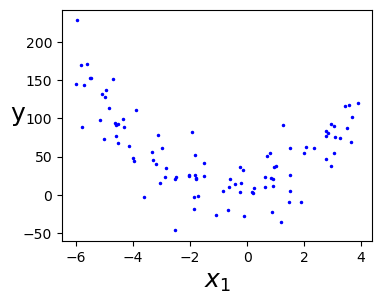

In [6]:
#繪製圖形與儲存

plt.figure(figsize=(4, 3))
plt.plot(x1, y, 'b.', markersize=3)
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('y', rotation=0, fontsize=18)
plt.savefig('plot_1.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [8]:
#將Data分成訓練集與測試集

from sklearn.model_selection import train_test_split
x1Train, x1Test, yTrain, yTest = train_test_split(x1, y, test_size=0.2, random_state=1)

In [10]:
#載入Pipeline與標準化封包

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [11]:
#使用Ridge Regression

from sklearn.linear_model import Ridge
ridgeReg = Pipeline([
    ('ploy', PolynomialFeatures(degree=2, include_bias=False)),
    ('scal', StandardScaler()),
    ('ridge', Ridge(alpha=m/2, random_state=1))
])
ridgeReg.fit(x1Train, yTrain)

Pipeline(steps=[('ploy', PolynomialFeatures(include_bias=False)),
                ('scal', StandardScaler()),
                ('ridge', Ridge(alpha=50.0, random_state=1))])

In [12]:
ridgeReg.score(x1Train,yTrain), ridgeReg.score(x1Test,yTest)   #計算訓練集與測試集的訓練分數

(0.5624715988861848, 0.5000997386648434)

In [13]:
ridgeReg.predict(x1Test[:3])

array([[50.49773754],
       [59.13869604],
       [31.86781274]])

In [15]:
#使用Pipeline與SGDRegressor()

from sklearn.linear_model import SGDRegressor
ridgeSgd = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scal', StandardScaler()),
    ('ridge', SGDRegressor(penalty='l2', alpha=1, random_state=1))
])
ridgeSgd.fit(x1Train, yTrain.ravel())

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('scal', StandardScaler()),
                ('ridge', SGDRegressor(alpha=1, random_state=1))])

In [16]:
ridgeSgd.score(x1Train,yTrain), ridgeSgd.score(x1Test,yTest)

(0.48914255940966433, 0.4132817374249068)

In [17]:
ridgeSgd.predict(x1Test[:3])

array([47.78375855, 58.58856714, 35.37888686])

In [18]:
#繪製模型

def plot_model(model, x1, y):
    x1s = np.linspace(x1.min(), x1.max(), 1000).reshape(-1,1)
    yPred = model.predict(x1s)
    
    plt.plot(x1Train, yTrain, 'b.', markersize=3)
    plt.plot(x1Test, yTest, 'gx', markersize=3)
    plt.plot(x1s, yPred, 'r-', linewidth=2, label='$\hat y$')
    
    plt.xlabel('$x_1$', fontsize=18)
    plt.ylabel('y', rotation=0, fontsize=18)
    plt.legend(loc='upper center', fontsize=10)
    plt.axis([x1.min()-0.1, x1.max()+0.1, y.min()-5, y.max()+5])

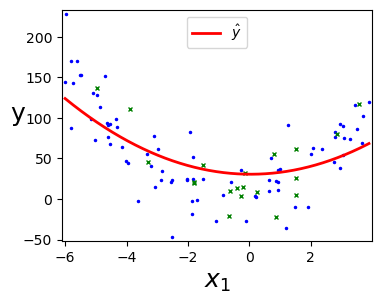

In [19]:
plt.figure(figsize=(4,3))
plot_model(ridgeReg, x1 ,y)
plt.show()

In [21]:
#使用Pineline與Lasso Regression
from sklearn.linear_model import Lasso
lassoReg = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scal', StandardScaler()),
    ('lasso', Lasso(alpha=1, random_state=1))
])
lassoReg.fit(x1Train, yTrain)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('scal', StandardScaler()),
                ('lasso', Lasso(alpha=1, random_state=1))])

In [22]:
lassoReg.score(x1Train,yTrain), lassoReg.score(x1Test, yTest)

(0.7289049773635354, 0.7090703555227444)

In [23]:
lassoReg.predict(x1Test[:3])

array([63.93127861, 47.72171974,  7.57641004])

In [25]:
#使用梯度下降法

lassoSgd = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scal', StandardScaler()),
    ('lasso', SGDRegressor(penalty='l1', alpha=1, random_state=1))
])
lassoSgd.fit(x1Train, yTrain.ravel())

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('scal', StandardScaler()),
                ('lasso', SGDRegressor(alpha=1, penalty='l1', random_state=1))])

In [26]:
lassoSgd.score(x1Train, yTrain), lassoSgd.score(x1Test, yTest)

(0.7284890196449929, 0.7089179245883366)

In [27]:
lassoSgd.predict(x1Test[:3])

array([63.65542504, 47.90341769,  7.82005821])

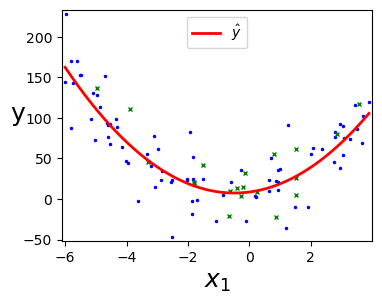

In [28]:
#繪製模型

plt.figure(figsize=(4,3))
plot_model(lassoReg, x1, y)
plt.show()

In [29]:
#使用 ElasticNet

from sklearn.linear_model import ElasticNet
elasticReg = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scal', StandardScaler()),
    ('elastic', ElasticNet(alpha=1, l1_ratio=0.5, random_state=1))
])

In [30]:
elasticReg.fit(x1Train, yTrain)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('scal', StandardScaler()),
                ('elastic', ElasticNet(alpha=1, random_state=1))])

In [31]:
elasticReg.score(x1Train, yTrain), elasticReg.score(x1Test, yTest)

(0.5863340512948914, 0.5331573407141718)

In [32]:
elasticReg.predict(x1Test[:3])

array([50.69422872, 58.62751416, 29.73199465])

In [35]:
elasticSgd = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scal', StandardScaler()),
    ('elastic', SGDRegressor(penalty='l2', l1_ratio=0.5, alpha=1, random_state=1))
])
elasticSgd.fit(x1Train, yTrain.ravel())

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('scal', StandardScaler()),
                ('elastic',
                 SGDRegressor(alpha=1, l1_ratio=0.5, random_state=1))])

In [37]:
elasticSgd.score(x1Train, yTrain), elasticSgd.score(x1Test, yTest)

(0.48914255940966433, 0.4132817374249068)

In [38]:
elasticSgd.predict(x1Test[:3])

array([47.78375855, 58.58856714, 35.37888686])

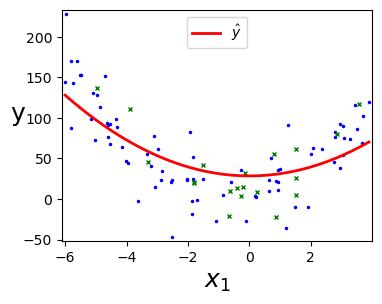

In [39]:
plt.figure(figsize=(4,3))
plot_model(elasticReg, x1, y)
plt.show()